In [1]:
# import make_blobs from sklearn
from sklearn.datasets import make_blobs

# import matplotlib
import matplotlib.pyplot as plt

# import Kmeans from sklearn
from sklearn.cluster import KMeans

# import numpy
import numpy as np

In [14]:
# generate clusters 
X, y = make_blobs(n_samples=150,
                  n_features=2,
                  centers=3,
                  cluster_std=0.5,
                  random_state=0)

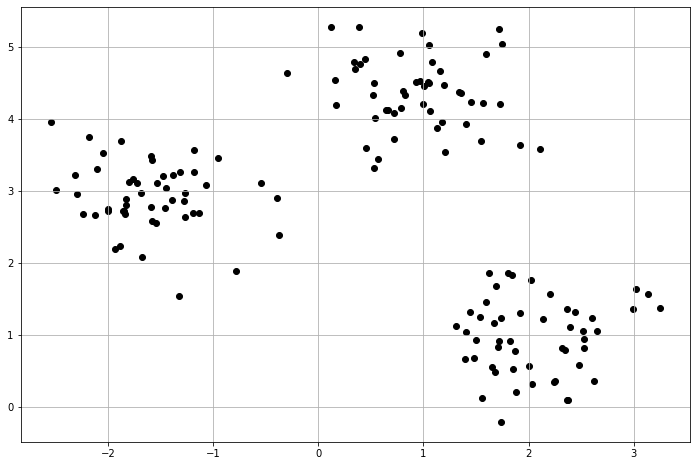

In [3]:
# set figure size
plt.rcParams["figure.figsize"] = (12,8)

# plot clusters
plt.scatter(X[:,0],
            X[:,1],
            c='black',
            marker='o')
plt.grid()
plt.show()

## k-means Clustering

In [4]:
km = KMeans(n_clusters=3, # how many clusters we expected 
            n_init=10, # how many initial runs
            random_state=0)

In [12]:
# fit and predict
y_km = km.fit_predict(X)

array([0, 2, 2, 2, 0, 2, 2, 0, 1, 2, 0, 1, 1, 2, 2, 1, 1, 0, 1, 0, 2, 0,
       2, 2, 1, 0, 0, 2, 1, 0, 1, 1, 1, 1, 2, 0, 0, 0, 2, 2, 1, 1, 2, 0,
       0, 0, 1, 2, 1, 2, 0, 2, 2, 0, 0, 1, 2, 0, 1, 2, 1, 1, 1, 1, 2, 1,
       2, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 1, 1, 2, 0, 0, 2, 2, 0, 0, 0, 1,
       1, 0, 0, 2, 0, 2, 0, 2, 1, 1, 0, 0, 0, 0, 1, 0, 0, 2, 1, 2, 2, 2,
       1, 2, 0, 1, 2, 1, 2, 2, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 2, 1, 0, 1, 2, 2, 0, 0, 1, 1, 1, 1, 0, 0])

In [6]:
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

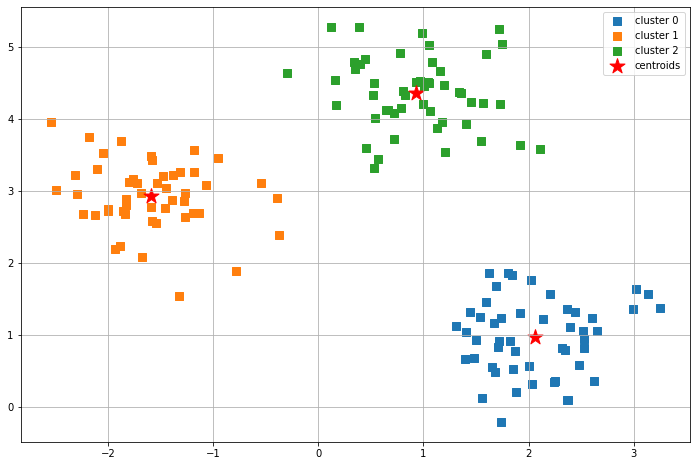

In [7]:
 # plot clustering result
plot_clusters(X, y_km, plt_cluster_centers= True)

## Elbow Rule

In [8]:
def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show() 

D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


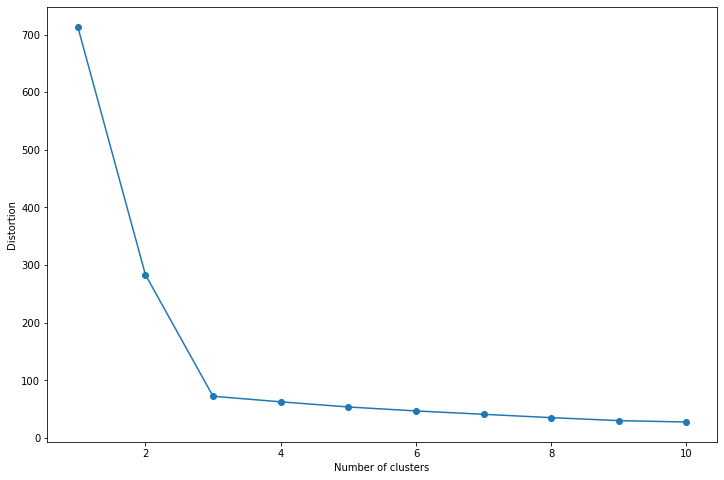

In [9]:
# elbow rule
plot_distortion(X,max_clusters=10)